# Clustering Heart disease patients

### May 8 2019

In [47]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import sklearn as sl

In [48]:
# Loading the dataset
heart_data = pd.read_csv("E:/Data Scientist/Datasets/heart_disease.csv")
print(heart_data.head())
print("\n")
print("Missing data",heart_data.isnull().sum())

   id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   63    1   1       145   233    1        2      150      0      2.3   
1   2   67    1   4       160   286    0        2      108      1      1.5   
2   3   67    1   4       120   229    0        2      129      1      2.6   
3   4   37    1   3       130   250    0        0      187      0      3.5   
4   5   41    0   2       130   204    0        2      172      0      1.4   

   slope  
0      3  
1      2  
2      2  
3      3  
4      1  


Missing data id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
dtype: int64


In [49]:
# There is no missing data in the data
# Check for type of features columns used in dataset
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
id          303 non-null int64
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
dtypes: float64(1), int64(11)
memory usage: 28.5 KB
None


In [50]:
# From the info method there is no categorical columns in dataset
# Now we look for primary statistics data using describe method
print(heart_data.describe())

               id         age         sex          cp    trestbps        chol  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868    3.158416  131.689769  246.693069   
std     87.612784    9.038662    0.467299    0.960126   17.599748   51.776918   
min      1.000000   29.000000    0.000000    1.000000   94.000000  126.000000   
25%     76.500000   48.000000    0.000000    3.000000  120.000000  211.000000   
50%    152.000000   56.000000    1.000000    3.000000  130.000000  241.000000   
75%    227.500000   61.000000    1.000000    4.000000  140.000000  275.000000   
max    303.000000   77.000000    1.000000    4.000000  200.000000  564.000000   

              fbs     restecg     thalach       exang     oldpeak       slope  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.148515    0.990099  149.607261    0.326733    1.039604    1.600660  
std      0.356198    0.994971 

In [51]:
# From first simple statistic as we see chol column has large range when compared to the other columns
# From id column it can be clear seen that it is just a row number of the dataset so we remove from the dataset
heart_data1 = heart_data.iloc[:,1:]

In [52]:
heart_data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63,1,1,145,233,1,2,150,0,2.3,3
1,67,1,4,160,286,0,2,108,1,1.5,2
2,67,1,4,120,229,0,2,129,1,2.6,2
3,37,1,3,130,250,0,0,187,0,3.5,3
4,41,0,2,130,204,0,2,172,0,1.4,1


In [53]:
# Now we scale this dataset for normalize by scale method
normalize_heart = scale(heart_data1)
print(type(normalize_heart))

<class 'numpy.ndarray'>


c:\users\gudis\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [54]:
# As we see "normalize_heart" is array type we need to convert into data frame
normalize_heart

array([[ 0.94872647,  0.68620244, -2.25177456, ..., -0.69663055,
         1.08733806,  2.27457861],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  1.43548113,
         0.39718162,  0.64911323],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  1.43548113,
         1.34614673,  0.64911323],
       ..., 
       [ 0.28381332,  0.68620244,  0.87798549, ...,  1.43548113,
         0.13837295,  0.64911323],
       [ 0.28381332, -1.4572959 , -1.20852121, ..., -0.69663055,
        -0.89686172,  0.64911323],
       [-1.82174501,  0.68620244, -0.16526786, ..., -0.69663055,
        -0.89686172, -0.97635214]])

In [55]:
# Converting the array into dataframe
normalize_heart = pd.DataFrame(normalize_heart)
normalize_heart.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352


In [56]:
# importing hiearchy clustering
from scipy.cluster.hierarchy import linkage
# for creating dendrogram
import scipy.cluster.hierarchy as sch 

In [57]:
z = linkage(normalize_heart,method ="complete", metric = "euclidean")
z1 = linkage(normalize_heart, method = "single", metric = "euclidean")

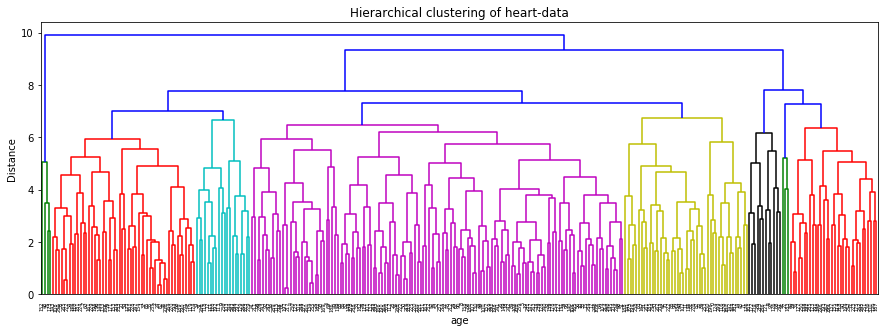

In [58]:
# Plot the dendrogram for z
plt.figure(figsize =(15,5))
plt.title("Hierarchical clustering of heart-data")
plt.xlabel("age")
plt.ylabel("Distance")
sch.dendrogram(z)
plt.show()

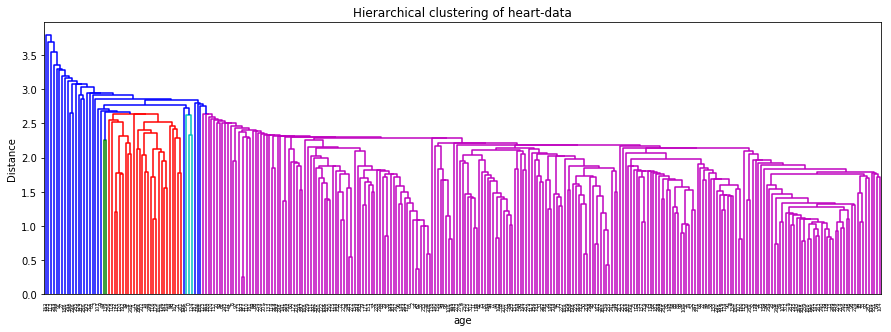

In [59]:
# plotting for dendrogram z1
plt.figure(figsize =(15,5))
plt.title("Hierarchical clustering of heart-data")
plt.xlabel("age")
plt.ylabel("Distance")
sch.dendrogram(z1)
plt.show()

In [60]:
# From these two plots we can describe that complete linkage is much more clear in the cluster than single linkage
# Now we go with the agglomerative clustering choosing  5 as clustering from dendrogram
from sklearn.cluster import AgglomerativeClustering

In [61]:
# cutting the dendrogram using no of clusters and distance
h_clust = AgglomerativeClustering(n_clusters = 5 , linkage = "complete", affinity = "euclidean").fit(normalize_heart)
h_clust.labels_

array([0, 1, 1, 0, 0, 0, 4, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0,
       0, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 4,
       0, 0, 0, 2, 0, 0, 3, 1, 0, 0, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2,
       0, 0, 0, 1, 1, 1, 4, 0, 2, 0, 0, 4, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 3, 1, 1, 2, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 4, 3, 1, 2, 0, 1, 0, 0, 0, 1, 0, 2,
       0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 1,
       1, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1,
       0, 4, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 4, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0,
       2, 2,

In [62]:
cluster = pd.DataFrame(h_clust.labels_)
cluster.head()

,0
0,0
1,1
2,1
3,0
4,0


In [63]:
heart_data1['clusters'] = cluster.iloc[:,:] 

In [64]:
heart_data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,clusters
0,63,1,1,145,233,1,2,150,0,2.3,3,0
1,67,1,4,160,286,0,2,108,1,1.5,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0


In [66]:
# Now cluster column is added to the dataset therefore we get the aggregate values for each cluster
# This aggregate values gives us the information about group of patients where treatment can be given according to the values
# Before getting the aggregating values we remove the transform categorical variables which is 'id', 'sex'
heart_data1.drop(['sex'],axis =1, inplace = True)

In [67]:
heart_data1.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,clusters
0,63,1,145,233,1,2,150,0,2.3,3,0
1,67,4,160,286,0,2,108,1,1.5,2,1
2,67,4,120,229,0,2,129,1,2.6,2,1
3,37,3,130,250,0,0,187,0,3.5,3,0
4,41,2,130,204,0,2,172,0,1.4,1,0


In [71]:
heart_data1.groupby(heart_data1.clusters).mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
clusters,,,,,,,,,,
0,51.416667,2.783333,129.138889,239.872222,0.122222,0.844444,161.572222,0.077778,0.555000,1.388889
1,58.111111,3.763889,130.041667,253.222222,0.180556,1.402778,135.541667,0.819444,1.451389,1.750000
2,59.000000,3.571429,134.771429,233.857143,0.142857,0.685714,116.885714,0.485714,2.240000,2.200000
3,64.750000,3.250000,138.750000,433.750000,0.250000,2.000000,156.250000,0.000000,1.100000,1.500000
4,61.000000,3.916667,168.500000,284.916667,0.333333,1.250000,147.750000,0.750000,2.316667,2.166667


In [ ]:
# These are the average values of the each cluster so if the new patients come in with the values doctor can suggest the treatment based on these clusters values
